### Goals 
The goal of this project is to apply some concepts & tools seen in the 3 parts of this course, this
project is organized into 3 parts :<br>
 Part 1 : Building Classical ML projects with respect to basic ML Coding best <br>practices<br>
 Part 2 : Integrate MLFlow to your project<br>
 Part 3 : Integrate ML Interpretability to your project<br>
### DataSet (Finance use case)
DataSet of Home Credit Risk Classification:<br>
https://www.kaggle.com/c/home-credit-default-risk/data<br>
you'll not use all the datasets available on Kaggle, only the main data set :<br>
application_train.csv<br>
application_test.csv<br>
You can also use a part of this dataset (an example is given for this Lab)

In [2]:
pip install xgboost

  Using cached xgboost-1.2.1-py3-none-win_amd64.whl (86.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
sys.executable.split('/')

['C:\\Users\\nana-\\anaconda3\\envs\\application_of_bdd\\python.exe']

In [1]:
import pandas as pd
import numpy as np

from pathlib import Path
ROOT = Path('Project Application of BD.ipynb').resolve().parents[1]

# Some sklearn tools for preprocessing and building a pipeline.
# ColumnTransformer was introduced in 0.20 so make sure you have this version
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Algorithms, from the easiest to the hardest to intepret.r
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [4]:
app_train = pd.read_csv(ROOT/"data/raw/application_train.csv",nrows=5000)

In [3]:
app_test = pd.read_csv(ROOT/"data/processed/app_test_processed.csv")

In [269]:
'TARGET' in app_test.columns.tolist()

True

In [264]:
if(app_test.columns.tolist()=

KeyError: 'TARGET'

In [258]:
app_test.isnull().sum()

AMT_CREDIT                  0
AMT_GOODS_PRICE             0
APARTMENTS_MODE             0
CODE_GENDER                 0
DAYS_BIRTH                  0
DAYS_ID_PUBLISH             0
DAYS_LAST_PHONE_CHANGE      0
DEF_30_CNT_SOCIAL_CIRCLE    0
EXT_SOURCE_1                0
EXT_SOURCE_2                0
EXT_SOURCE_3                0
FLAG_DOCUMENT_3             0
FLAG_OWN_CAR                0
FLOORSMAX_MODE              0
LIVE_CITY_NOT_WORK_CITY     0
NAME_EDUCATION_TYPE         0
NONLIVINGAREA_MODE          0
OBS_30_CNT_SOCIAL_CIRCLE    0
REG_CITY_NOT_LIVE_CITY      0
REG_CITY_NOT_WORK_CITY      0
dtype: int64

In [251]:
app_test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

app_train = pd.get_dummies(app_train, drop_first=True)

feature_selected =['TARGET','AMT_CREDIT','AMT_GOODS_PRICE','APARTMENTS_MODE','CODE_GENDER_M','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','DEF_30_CNT_SOCIAL_CIRCLE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','FLAG_DOCUMENT_3','FLAG_OWN_CAR_Y','FLOORSMAX_MODE','LIVE_CITY_NOT_WORK_CITY','NAME_EDUCATION_TYPE_Higher education','NONLIVINGAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY']
app_train=app_train[feature_selected]

In [5]:
app_train.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [6]:
#https://www.kaggle.com/sz8416/6-ways-for-feature-selection
#intersection of 6 ways of feature selection
feature_selected =['TARGET','AMT_CREDIT','AMT_GOODS_PRICE','APARTMENTS_MODE','CODE_GENDER','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','DEF_30_CNT_SOCIAL_CIRCLE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','FLAG_DOCUMENT_3','FLAG_OWN_CAR','FLOORSMAX_MODE','LIVE_CITY_NOT_WORK_CITY','NAME_EDUCATION_TYPE','NONLIVINGAREA_MODE','OBS_30_CNT_SOCIAL_CIRCLE','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY']
app_train=app_train[feature_selected]

# Feature selection

application_sample1 = app_train.loc[app_train.TARGET==1].sample(frac=0.1, replace=False)
print('label 1 sample size:', str(application_sample1.shape[0]))
application_sample0 = app_train.loc[app_train.TARGET==0].sample(frac=0.1, replace=False)
print('label 0 sample size:', str(application_sample0.shape[0]))
application = pd.concat([application_sample1, application_sample0], axis=0).sort_values('SK_ID_CURR')

from sklearn.impute import SimpleImputer
application[num_features] = SimpleImputer(strategy='median').fit_transform(application[num_features])

application = pd.get_dummies(application, drop_first=True)

print(application.shape)

X = application.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = application.TARGET
feature_name = X.columns.tolist()

def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y)
print(str(len(cor_feature)), 'selected features')

X=X[cor_feature]

X

cor_feature

In [7]:
len(app_train)

5000

In [8]:
app_train.head()

,TARGET,AMT_CREDIT,AMT_GOODS_PRICE,APARTMENTS_MODE,CODE_GENDER,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_1,...,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_OWN_CAR,FLOORSMAX_MODE,LIVE_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY
0,1,406597.5,351000.0,0.0252,M,-9461,-2120,-1134.0,2.0,0.083037,...,0.139376,1,N,0.0833,0,Secondary / secondary special,0.0,2.0,0,0
1,0,1293502.5,1129500.0,0.0924,F,-16765,-291,-828.0,0.0,0.311267,...,NaN,1,N,0.2917,0,Higher education,0.0,1.0,0,0
2,0,135000.0,135000.0,NaN,M,-19046,-2531,-815.0,0.0,NaN,...,0.729567,0,Y,NaN,0,Secondary / secondary special,NaN,0.0,0,0
3,0,312682.5,297000.0,NaN,F,-19005,-2437,-617.0,0.0,NaN,...,NaN,1,N,NaN,0,Secondary / secondary special,NaN,2.0,0,0
4,0,513000.0,513000.0,NaN,M,-19932,-3458,-1106.0,0.0,NaN,...,NaN,0,N,NaN,1,Secondary / secondary special,NaN,0.0,0,1


In [9]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 21 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
EXT_SOURCE_1,2827,56.5
NONLIVINGAREA_MODE,2677,53.5
APARTMENTS_MODE,2487,49.7
FLOORSMAX_MODE,2424,48.5
EXT_SOURCE_3,975,19.5
DEF_30_CNT_SOCIAL_CIRCLE,23,0.5
OBS_30_CNT_SOCIAL_CIRCLE,23,0.5
EXT_SOURCE_2,16,0.3
AMT_GOODS_PRICE,1,0.0


In [11]:
def application_train_test(df):
    # Read data and merge
    
    #test_df = pd.read_csv('../input/application_test.csv', nrows= num_rows)
    print(len(df))
    #df = df.append(test_df).reset_index()
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    #df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    #for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    #    df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    #df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    return df


In [12]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    11
int64       7
object      3
dtype: int64

In [13]:
# Some such as default would be binary features, but since
# they have a third class "unknown" we'll process them as non binary categorical
num_features=[]
cat_features=[]
for i in list(zip(app_train.columns,app_train.dtypes)):
    if (i[1] != 'object') :
        num_features.append(i[0])
    else : 
        cat_features.append(i[0])
num_features.remove("TARGET")

In [14]:
len(num_features),len(cat_features)

(17, 3)

test = application_train_test(app_train)

test

In [15]:
#replace every nan of numerical features by the mean of this feature
for column in num_features:    
    app_train[column].fillna((app_train[column].mean()),inplace=True)

In [16]:
app_train[num_features].isnull().sum()

AMT_CREDIT                  0
AMT_GOODS_PRICE             0
APARTMENTS_MODE             0
DAYS_BIRTH                  0
DAYS_ID_PUBLISH             0
DAYS_LAST_PHONE_CHANGE      0
DEF_30_CNT_SOCIAL_CIRCLE    0
EXT_SOURCE_1                0
EXT_SOURCE_2                0
EXT_SOURCE_3                0
FLAG_DOCUMENT_3             0
FLOORSMAX_MODE              0
LIVE_CITY_NOT_WORK_CITY     0
NONLIVINGAREA_MODE          0
OBS_30_CNT_SOCIAL_CIRCLE    0
REG_CITY_NOT_LIVE_CITY      0
REG_CITY_NOT_WORK_CITY      0
dtype: int64

In [17]:
app_train.dropna(inplace=True)

In [18]:
len(app_train)

5000

In [19]:
app_train[cat_features].isnull().sum()

CODE_GENDER            0
FLAG_OWN_CAR           0
NAME_EDUCATION_TYPE    0
dtype: int64

In [20]:
num_features

['AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'APARTMENTS_MODE',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_3',
 'FLOORSMAX_MODE',
 'LIVE_CITY_NOT_WORK_CITY',
 'NONLIVINGAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY']

In [21]:
# Get X, y
y = app_train["TARGET"]
X = app_train.drop("TARGET", axis=1)

In [22]:
preprocessor = ColumnTransformer([("numerical", "passthrough", num_features),
 ("categorical", OneHotEncoder(sparse=False, handle_unknown='ignore'),
 cat_features)])

In [23]:
# XGBoost
xgb_model = Pipeline([("preprocessor", preprocessor),
 # Add a scale_pos_weight to make it balanced
 ("model", XGBClassifier(scale_pos_weight=(1 - y.mean()), n_jobs=-1))])

# Random Forest
rf_model = Pipeline([("preprocessor", preprocessor),
 ("model", RandomForestClassifier(class_weight="balanced", n_estimators=100))])

#GradientBoostingClassifier
gb_model = Pipeline([("preprocessor", preprocessor),
 ("model", GradientBoostingClassifier())])

# XGBoost
xgb_model =XGBClassifier(scale_pos_weight=(1 - y.mean()))

# Random Forest
rf_model = RandomForestClassifier(class_weight="balanced", n_estimators=100)

#GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=42)

# XGBOOST

In [25]:
gs = GridSearchCV(xgb_model, {"model__max_depth": [5, 10],
 "model__min_child_weight": [5, 10],
 "model__n_estimators": [25]},
 n_jobs=-1, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

xgb_model.set_params(**gs.best_params_)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

{'model__max_depth': 5, 'model__min_child_weight': 10, 'model__n_estimators': 25}
0.9208571428571428


0.922

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1384
           1       0.44      0.03      0.06       116

    accuracy                           0.92      1500
   macro avg       0.68      0.52      0.51      1500
weighted avg       0.89      0.92      0.89      1500



In [38]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.95      1384\n           1       0.22      0.04      0.07       116\n\n    accuracy                           0.91      1500\n   macro avg       0.57      0.52      0.51      1500\nweighted avg       0.87      0.91      0.89      1500\n'

In [27]:
confusion_matrix(y_test, y_pred)

array([[1379,    5],
       [ 112,    4]], dtype=int64)

# RANDOM FOREST

In [28]:
gs = GridSearchCV(rf_model, {"model__max_depth": [10, 15],
 "model__min_samples_split": [5, 10]},
 n_jobs=-1, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

rf_model.set_params(**gs.best_params_)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

{'model__max_depth': 15, 'model__min_samples_split': 5}
0.9174285714285715


0.916

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1384
           1       0.19      0.03      0.05       116

    accuracy                           0.92      1500
   macro avg       0.56      0.51      0.50      1500
weighted avg       0.87      0.92      0.89      1500



In [30]:
confusion_matrix(y_test, y_pred)

array([[1371,   13],
       [ 113,    3]], dtype=int64)

# GRADIENT BOOSTING

In [31]:
gs = GridSearchCV(gb_model, {"model__max_depth": [10, 15],
 "model__min_samples_split": [5, 10]},
 n_jobs=-1, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

gb_model.set_params(**gs.best_params_)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
accuracy_score(y_test, y_pred)

{'model__max_depth': 15, 'model__min_samples_split': 10}
0.9165714285714287


0.914

In [57]:
y_pred = xgb_model.predict(X_test)

In [58]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1384
           1       0.22      0.04      0.07       116

    accuracy                           0.91      1500
   macro avg       0.57      0.52      0.51      1500
weighted avg       0.87      0.91      0.89      1500



In [33]:
confusion_matrix(y_test, y_pred)

array([[1366,   18],
       [ 111,    5]], dtype=int64)

In [32]:
conda install eli5

SyntaxError: invalid syntax (<ipython-input-32-c8e9af62f75d>, line 1)

In [39]:
import eli5
eli5.show_weights(rf_model.named_steps["model"])
#That gives us the weights associated to each feature, that can be seen as the contribution of each feature into
#predicting that the class will be y=1 (the client will subscribe after the campaign).
#The names for each features aren't really helping though, we can pass a list of column names to eli5 but
#we'll need to do a little gymnastics first to extract names from our preprocessor in the pipeline (since we've
#generated new features on the fly with the one hot encoder)

C:\Users\nana-\anaconda3\envs\application_of_bdd\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\nana-\anaconda3\envs\application_of_bdd\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.1619 ± 0.0876,x8
0.1397 ± 0.0753,x9
0.1037 ± 0.0509,x4
0.0848 ± 0.0566,x3
0.0726 ± 0.0473,x5
0.0712 ± 0.0439,x0
0.0635 ± 0.0383,x1
0.0551 ± 0.0451,x7
0.0469 ± 0.0360,x2
0.0328 ± 0.0283,x14


In [40]:
preprocessor = rf_model.named_steps["preprocessor"]
ohe_categories = preprocessor.named_transformers_["categorical"].categories_
new_ohe_features = [f"{col}__{val}" for col, vals in zip(cat_features, ohe_categories) for val in vals]
all_features = num_features + new_ohe_features
eli5.show_weights(rf_model.named_steps["model"], feature_names=all_features)

Weight,Feature
0.1619 ± 0.0876,EXT_SOURCE_2
0.1397 ± 0.0753,EXT_SOURCE_3
0.1037 ± 0.0509,DAYS_ID_PUBLISH
0.0848 ± 0.0566,DAYS_BIRTH
0.0726 ± 0.0473,DAYS_LAST_PHONE_CHANGE
0.0712 ± 0.0439,AMT_CREDIT
0.0635 ± 0.0383,AMT_GOODS_PRICE
0.0551 ± 0.0451,EXT_SOURCE_1
0.0469 ± 0.0360,APARTMENTS_MODE
0.0328 ± 0.0283,OBS_30_CNT_SOCIAL_CIRCLE


In [41]:
import shap
# Need to load JS vis in the notebook
shap.initjs() 

In [42]:
explainer = shap.TreeExplainer(xgb_model.named_steps["model"])

In [43]:
observations = xgb_model.named_steps["preprocessor"].transform(X_train.sample(796, random_state=42))
shap_values = explainer.shap_values(observations)

In [44]:
i = 0
shap.force_plot(explainer.expected_value, shap_values[i],
 features=observations[i], feature_names=all_features)

In [45]:
shap.force_plot(explainer.expected_value, shap_values,
 features=observations, feature_names=all_features)

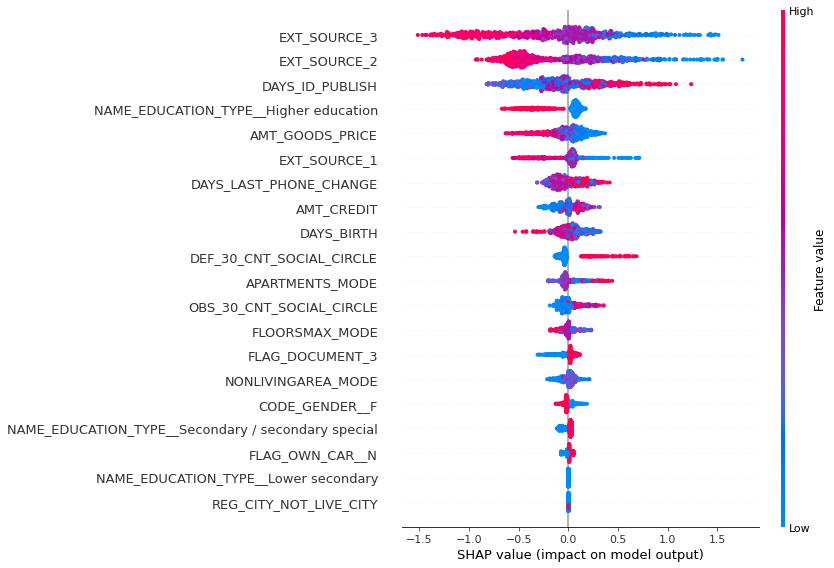

In [46]:
shap.summary_plot(shap_values, features=observations, feature_names=all_features)